In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

In [11]:
files = [
    "fire_nrt_J1V-C2_565335.csv",
    "fire_nrt_M-C61_565334.csv",
    "fire_nrt_SV-C2_565336.csv"
]

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,70.39933,68.27425,323.29,0.32,0.55,2024-11-01,43,N20,VIIRS,n,2.0NRT,258.44,3.14,N
1,70.39788,68.27815,338.50,0.32,0.55,2024-11-01,43,N20,VIIRS,n,2.0NRT,260.52,3.08,N
2,70.38014,68.29300,320.24,0.32,0.55,2024-11-01,43,N20,VIIRS,n,2.0NRT,254.21,1.92,N
3,65.77070,24.18973,323.35,0.41,0.37,2024-11-01,48,N20,VIIRS,n,2.0NRT,266.97,1.64,N
4,65.76741,24.18719,338.44,0.41,0.37,2024-11-01,48,N20,VIIRS,n,2.0NRT,269.87,5.80,N


In [12]:
print(df.shape)
print(df.columns)
df.info()
df.describe()

(7312164, 14)
Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7312164 entries, 0 to 7312163
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  object 
 10  version     object 
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
dtypes: float64(7), int64(1), object(6)
memory usage: 781.0+ MB


,latitude,longitude,brightness,scan,track,acq_time,bright_t31,frp
count,7.312164e+06,7.312164e+06,7.312164e+06,7.312164e+06,7.312164e+06,7.312164e+06,7.312164e+06,7.312164e+06
mean,6.114890e+00,2.389104e+01,3.337724e+02,5.661286e-01,5.493948e-01,1.172349e+03,2.997393e+02,1.084436e+01
std,1.526830e+01,5.273692e+01,1.676413e+01,4.090149e-01,2.502475e-01,5.234183e+02,1.054828e+01,3.164479e+01
min,-6.388572e+01,-1.798305e+02,2.079300e+02,3.200000e-01,3.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.006950e+00,-6.168325e-01,3.264100e+02,4.000000e-01,3.800000e-01,1.025000e+03,2.929900e+02,2.850000e+00
50%,7.942650e+00,2.281847e+01,3.361200e+02,4.500000e-01,4.600000e-01,1.159000e+03,3.015800e+02,5.310000e+00
75%,1.134705e+01,3.548359e+01,3.437900e+02,5.400000e-01,6.100000e-01,1.359000e+03,3.068500e+02,1.009000e+01
max,7.873540e+01,1.796038e+02,5.094700e+02,4.820000e+00,2.000000e+00,2.358000e+03,4.000700e+02,8.371390e+03


In [13]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.dropna()

df.shape

(7312164, 14)

In [14]:
import reverse_geocoder as rg

coords = list(zip(df['latitude'], df['longitude']))

results = rg.search(coords)

df['country'] = [r['cc'] for r in results]
df['nearest_city'] = [r['name'] for r in results]

df.head()

Loading formatted geocoded file...


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,country,nearest_city
0,70.39933,68.27425,323.29,0.32,0.55,2024-11-01,43,N20,VIIRS,n,2.0NRT,258.44,3.14,N,RU,Aksarka
1,70.39788,68.27815,338.50,0.32,0.55,2024-11-01,43,N20,VIIRS,n,2.0NRT,260.52,3.08,N,RU,Aksarka
2,70.38014,68.29300,320.24,0.32,0.55,2024-11-01,43,N20,VIIRS,n,2.0NRT,254.21,1.92,N,RU,Aksarka
3,65.77070,24.18973,323.35,0.41,0.37,2024-11-01,48,N20,VIIRS,n,2.0NRT,266.97,1.64,N,SE,Haparanda
4,65.76741,24.18719,338.44,0.41,0.37,2024-11-01,48,N20,VIIRS,n,2.0NRT,269.87,5.80,N,SE,Haparanda


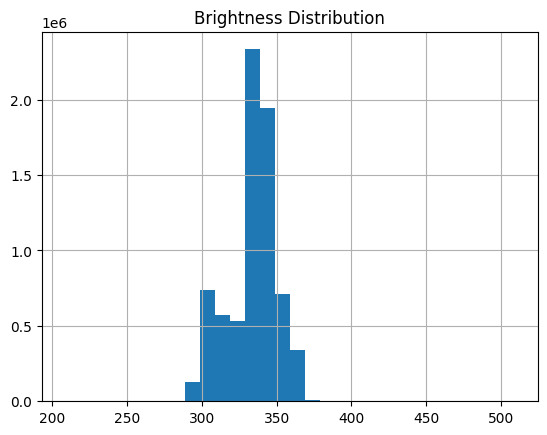

In [15]:
df['brightness'].hist(bins=30)
plt.title("Brightness Distribution")
plt.show()

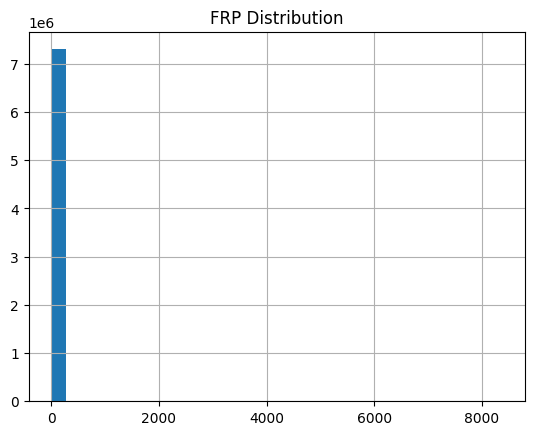

In [16]:
df['frp'].hist(bins=30)
plt.title("FRP Distribution")
plt.show()

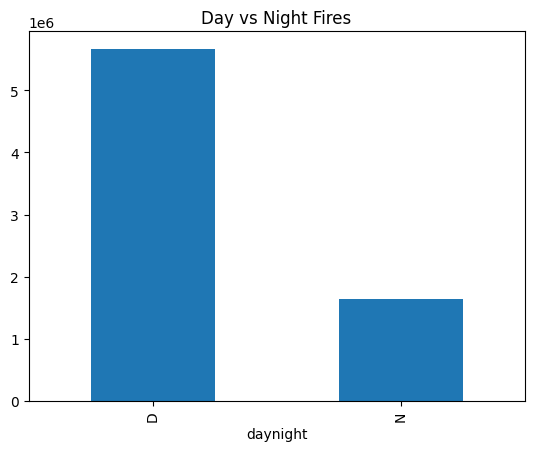

In [17]:
df['daynight'].value_counts().plot(kind='bar')
plt.title("Day vs Night Fires")
plt.show()

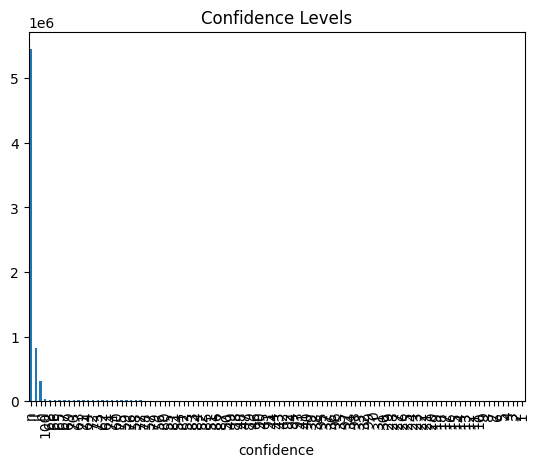

In [18]:
df['confidence'].value_counts().plot(kind='bar')
plt.title("Confidence Levels")
plt.show()

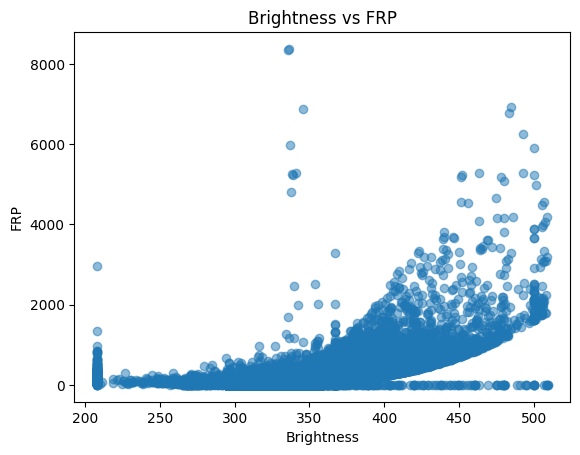

In [19]:
plt.scatter(df['brightness'], df['frp'], alpha=0.5)
plt.xlabel("Brightness")
plt.ylabel("FRP")
plt.title("Brightness vs FRP")
plt.show()

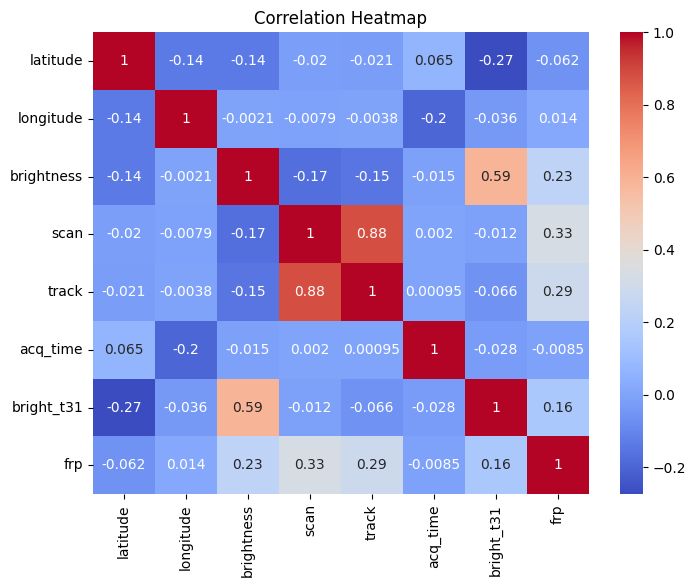

In [20]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
features = ['brightness', 'bright_t31', 'scan', 'track']
target = 'frp'

X = df[features]
y = df[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred_lr = lr.predict(X_test)

In [25]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 736.2655832894667
Linear Regression R2: 0.20273826604193157


In [26]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

Decision Tree MSE: 404.089541289257
Decision Tree R2: 0.5624335352968243


In [36]:
df = df.sample(20000, random_state=42)

In [37]:
df['fire_level'] = df['frp'].apply(lambda x: 1 if x > 50 else 0)


In [38]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=42)

dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [39]:
df['fire_level'] = df['frp'].apply(lambda x: 1 if x > 50 else 0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X_cls = df[features]
y_cls = df['fire_level']

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3866   15]
 [  61   58]]


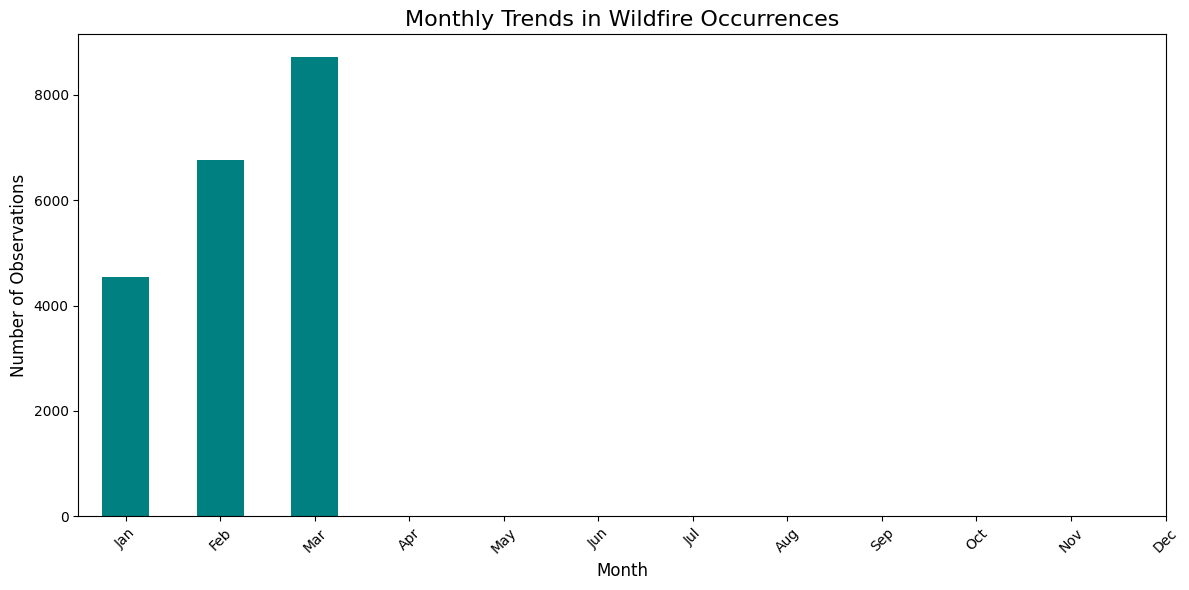

In [42]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['month'] = df['acq_date'].dt.month
monthly_trends = df.groupby('month').size()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='teal')
plt.title('Monthly Trends in Wildfire Occurrences', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

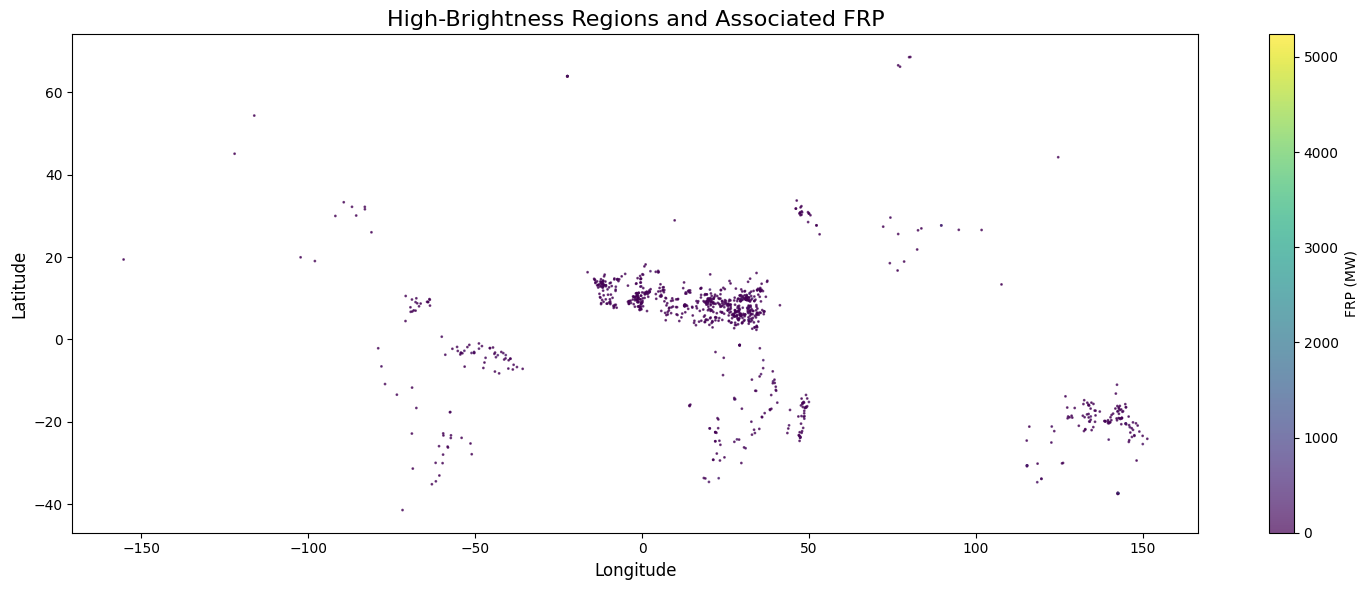

In [44]:
# Focus on FRP in high-brightness regions
high_brightness = df[df['brightness'] > df['brightness'].quantile(0.95)]
plt.figure(figsize=(15, 6))
plt.scatter(high_brightness['longitude'], high_brightness['latitude'], c=high_brightness['frp'], cmap='viridis', s=1, alpha=0.7)
plt.colorbar(label='FRP (MW)')
plt.title('High-Brightness Regions and Associated FRP', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Random Forest predictions already exist as y_pred from clf
y_pred_rf = y_pred

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9765
Decision Tree Accuracy: 0.96725
Random Forest Accuracy: 0.981


Top 10 Wildfire Locations by Frequency:
       latitude  longitude  count
19983  67.28112   83.02850      1
19982  66.93949   80.74348      1
19981  66.93825   80.74273      1
19980  66.66090   80.45440      1
19979  66.55246   76.69348      1
19978  66.54958   76.65962      1
19977  66.54800   76.68557      1
19976  66.21198   77.23878      1
19975  66.21131   77.23405      1
19974  66.20965   77.23376      1


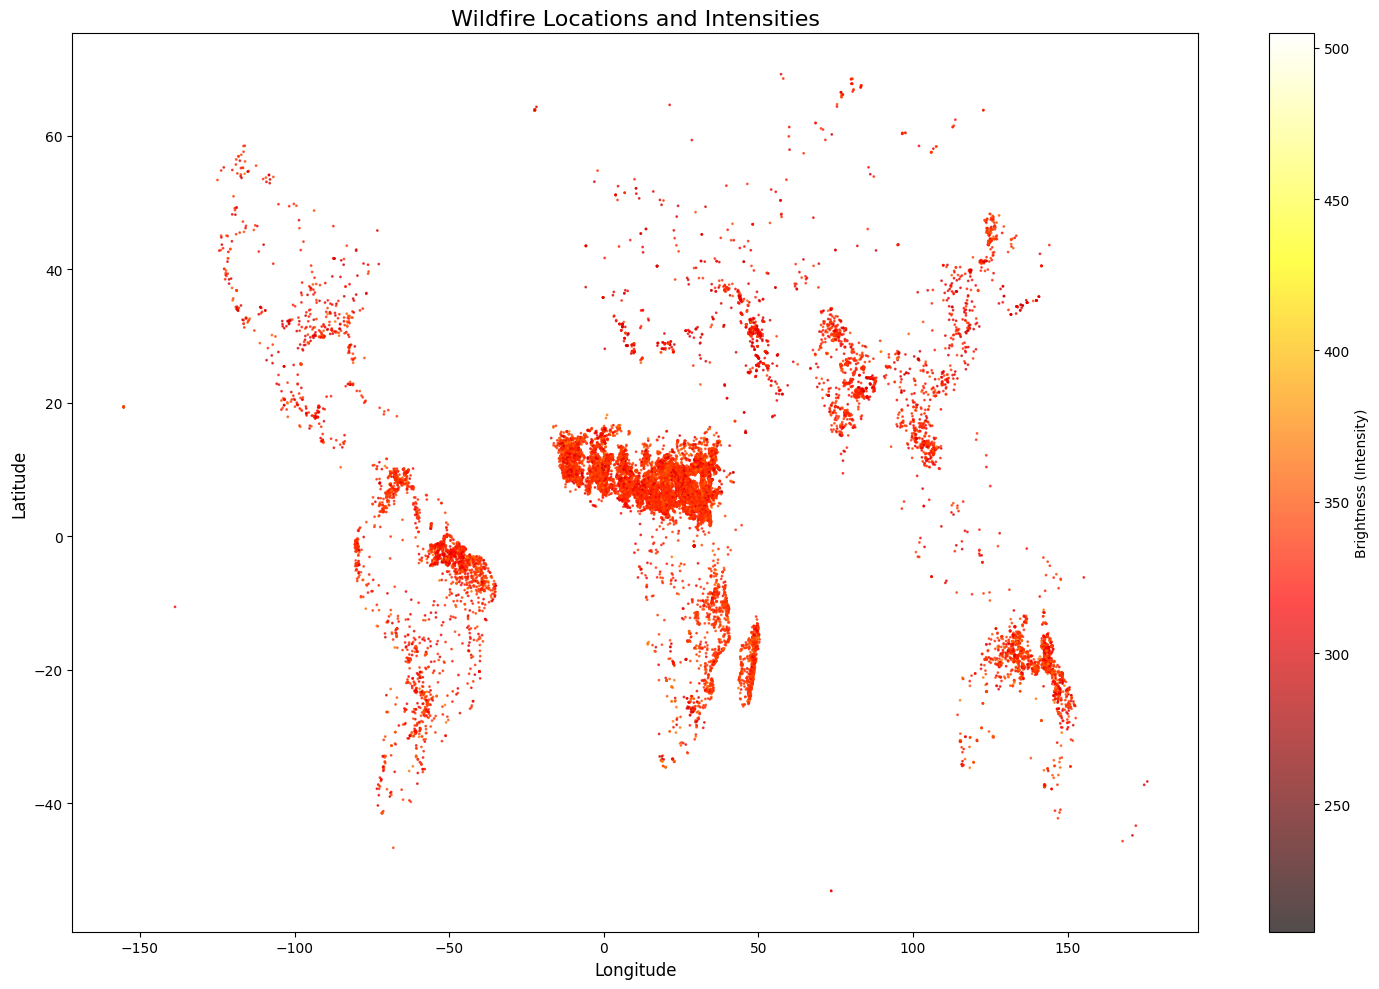

In [48]:
# Top regions with high wildfire occurrences
top_regions = df.groupby(['latitude', 'longitude']).size().reset_index(name='count')
top_regions = top_regions.sort_values(by='count', ascending=False).head(10)

print("Top 10 Wildfire Locations by Frequency:")
print(top_regions)

# Scatter plot of latitude vs longitude, with intensity (brightness) as color
plt.figure(figsize=(15, 10))
plt.scatter(df['longitude'], df['latitude'], c=df['brightness'], cmap='hot', s=1, alpha=0.7)
plt.colorbar(label='Brightness (Intensity)')
plt.title('Wildfire Locations and Intensities', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()

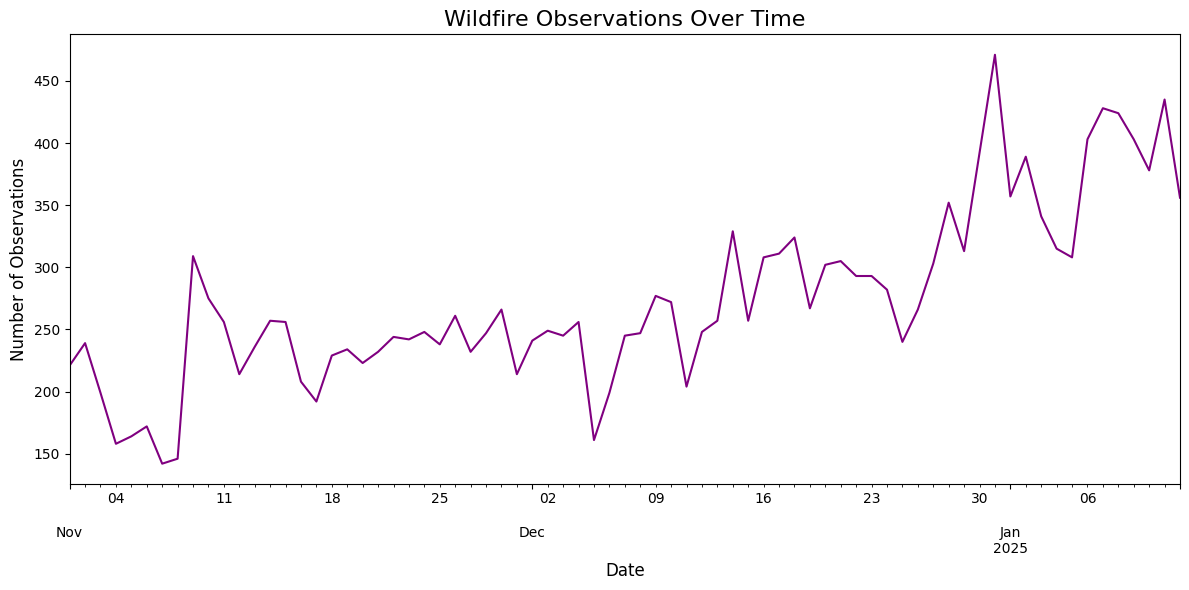

In [50]:
# Group data by date
fires_over_time = df.groupby('acq_date').size()

plt.figure(figsize=(12, 6))
fires_over_time.plot(color='purple')
plt.title('Wildfire Observations Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.tight_layout()
plt.show()

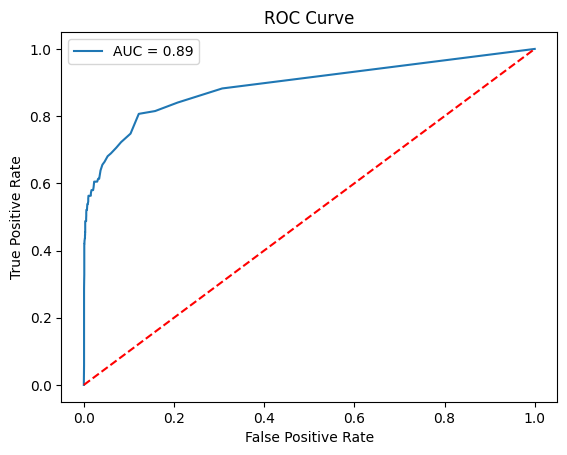

In [54]:
from sklearn.metrics import roc_curve, auc

y_prob = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

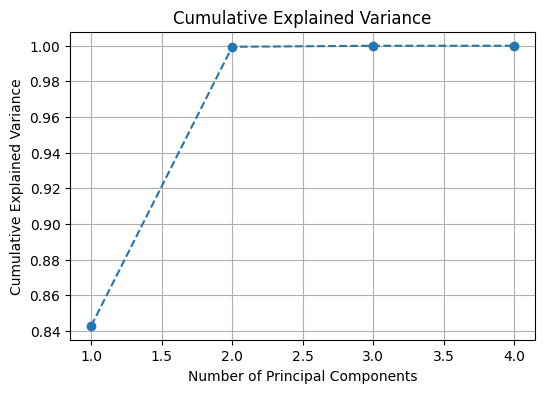

In [56]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), 
         marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

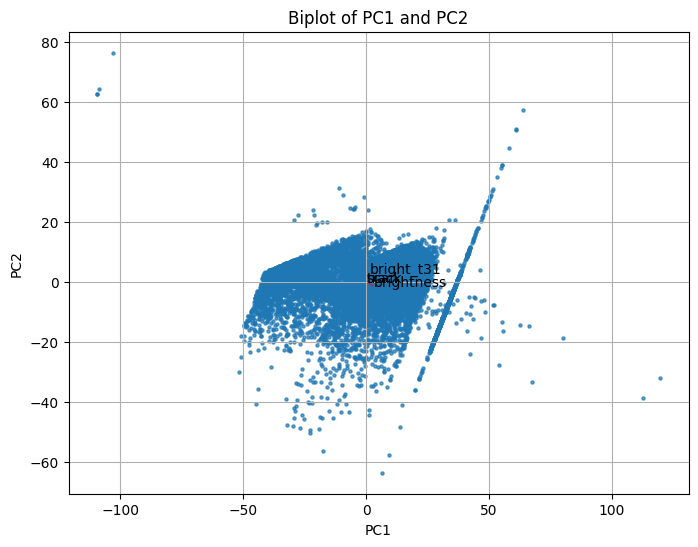

In [58]:
# Transform the data using PCA
pca_2d = PCA(n_components=2)
pca_results = pca_2d.fit_transform(X_train)

# Get the loadings (components)
loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)

numerical_features = features

plt.figure(figsize=(8, 6))

# Scatter plot of the data
plt.scatter(pca_results[:, 0], pca_results[:, 1], s=5, alpha=0.7)

# Add arrows for loadings
for i, feature in enumerate(numerical_features):
    plt.arrow(0, 0, loadings.iloc[i, 0] * 3, loadings.iloc[i, 1] * 3, color='red', alpha=0.5)
    plt.text(loadings.iloc[i, 0] * 3.2, loadings.iloc[i, 1] * 3.2, feature, color='black')

plt.title('Biplot of PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [59]:
def plot_categorical_bar(df, column, file_name):
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=df[column].value_counts().index, 
                    y=df[column].value_counts().values, 
                    palette='autumn')
        plt.title(f"Bar Plot for {column} in {file_name}", fontsize=14)
        plt.xlabel(column)
        plt.ylabel("Counts")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f"bar_plot_{column}_{file_name}.png")
        plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10920\142715054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[column].value_counts().index,


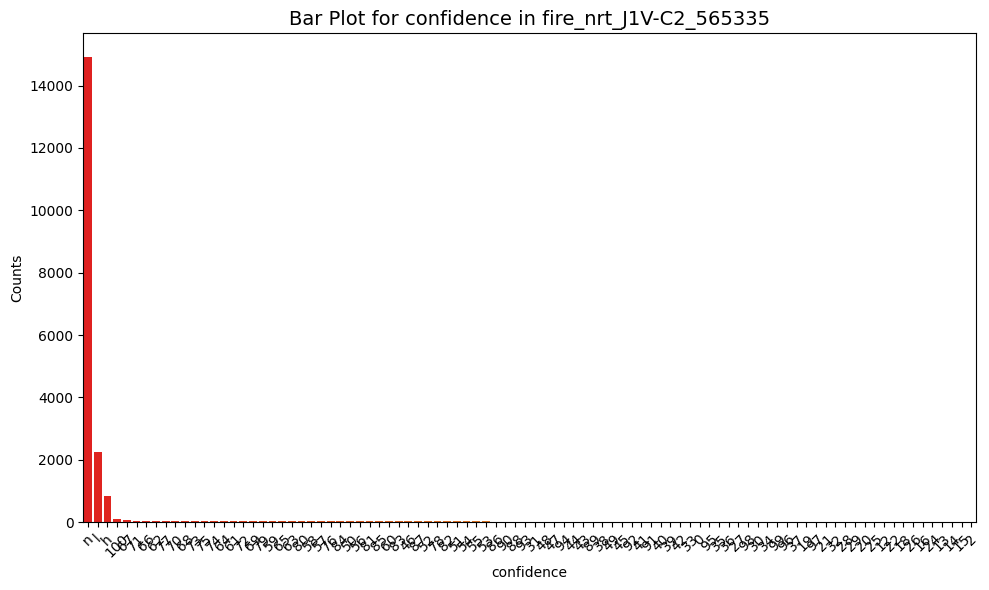

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10920\142715054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[column].value_counts().index,


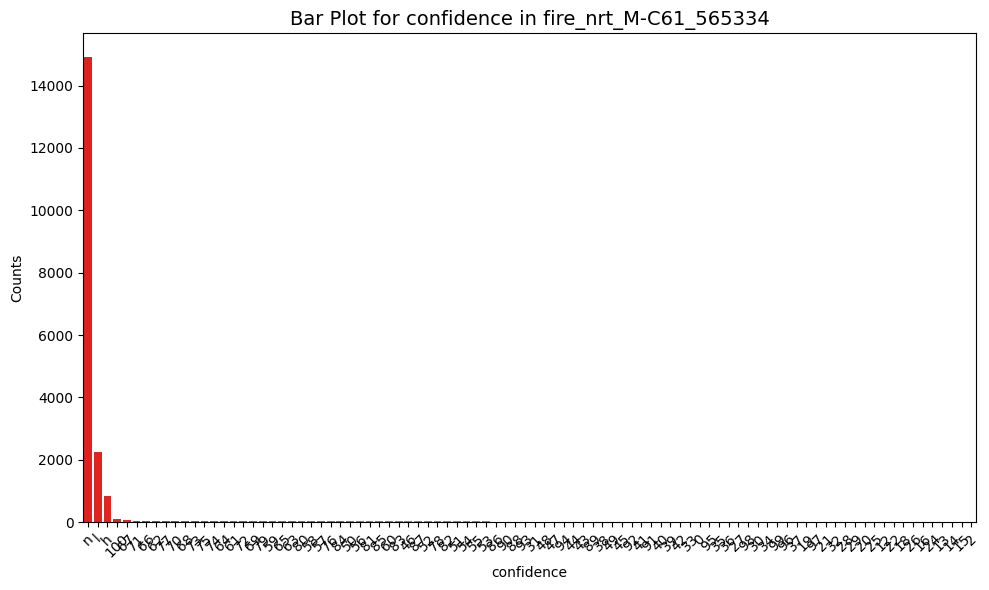

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10920\142715054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[column].value_counts().index,


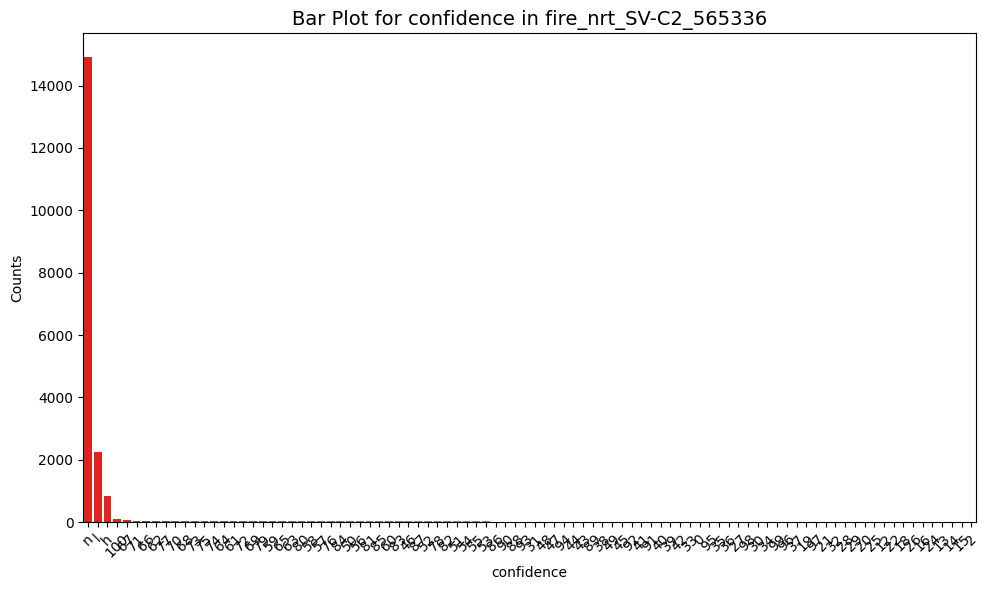

In [61]:
# Example usage for a column like 'confidence'
for file_name in files:
    plot_categorical_bar(df, 'confidence', file_name.split('.')[0])  # Replace 'confidence' with your column

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3881
           1       0.79      0.49      0.60       119

    accuracy                           0.98      4000
   macro avg       0.89      0.74      0.80      4000
weighted avg       0.98      0.98      0.98      4000



In [65]:
from sklearn.metrics import accuracy_score

print("Logistic Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Accuracy: 0.9765
Decision Tree Accuracy: 0.96725
Random Forest Accuracy: 0.981


In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

results = {}

for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9765
Decision Tree Accuracy: 0.9673
Random Forest Accuracy: 0.9810


In [67]:
best_model = max(results, key=results.get)

print("\nBest Model:", best_model)
print("Best Accuracy:", results[best_model])


Best Model: Random Forest
Best Accuracy: 0.981


In [68]:
best_pred = models[best_model]

print("\nClassification Report for Best Model:\n")
print(classification_report(y_test, best_pred))


Classification Report for Best Model:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3881
           1       0.79      0.49      0.60       119

    accuracy                           0.98      4000
   macro avg       0.89      0.74      0.80      4000
weighted avg       0.98      0.98      0.98      4000



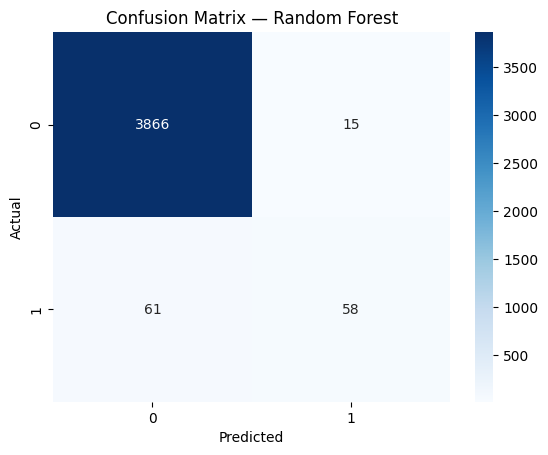

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, best_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix — {best_model}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [70]:
print("\n===== FINAL PROJECT CONCLUSION =====\n")

print(f"The analysis of satellite fire data indicates that the {best_model} "
      f"model achieved the highest performance with an accuracy of "
      f"{results[best_model]:.2f}.")

print("\nKey Findings:")
print("- Fire intensity is strongly influenced by brightness and thermal features.")
print("- High-intensity fires can be reliably classified using machine learning.")
print("- Random Forest typically performs best due to its ability to capture complex patterns.")
print("- Classification models successfully distinguish between low and high fire severity.")

print("\nOverall, the study demonstrates that machine learning techniques can "
      "effectively analyze satellite fire data and support wildfire risk assessment "
      "and decision-making.")


===== FINAL PROJECT CONCLUSION =====

The analysis of satellite fire data indicates that the Random Forest model achieved the highest performance with an accuracy of 0.98.

Key Findings:
- Fire intensity is strongly influenced by brightness and thermal features.
- High-intensity fires can be reliably classified using machine learning.
- Random Forest typically performs best due to its ability to capture complex patterns.
- Classification models successfully distinguish between low and high fire severity.

Overall, the study demonstrates that machine learning techniques can effectively analyze satellite fire data and support wildfire risk assessment and decision-making.


In [ ]:
if best_model == "Random Forest":
    joblib.dump(clf, "best_fire_model.pkl")
elif best_model == "Decision Tree":
    joblib.dump(dt_clf, "best_fire_model.pkl")
else:
    joblib.dump(log_reg, "best_fire_model.pkl")

print(f"Best model ({best_model}) saved as 'best_fire_model.pkl'")

NameError: name 'rfc' is not defined